In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.utils import get_config, read_files

In [4]:
config = get_config.read_yaml()

In [5]:
ticker = config['data']['tickers_nifty_200'][0]
ticker

'ABB.NS'

In [6]:
data = read_files.read_raw_equity_data(ticker)
data

Reading Equity data: ABB.NS !
Successfully read: ABB.NS !


Price,Close,High,Low,Open,Volume
Ticker,ABB.NS,ABB.NS,ABB.NS,ABB.NS,ABB.NS
Date,,,,,
2015-09-28,920.614929,957.102636,916.555940,951.516002,39496
2015-09-29,912.584229,916.861528,889.146611,912.191446,97769
2015-09-30,925.066833,945.187423,907.914150,945.187423,59984
2015-10-01,921.226013,950.599442,913.107918,929.474977,25472
2015-10-05,965.831787,968.930621,920.920582,929.649653,95998
...,...,...,...,...,...
2025-09-22,5362.799805,5455.299805,5341.000000,5430.000000,155891
2025-09-23,5298.700195,5375.399902,5285.000000,5360.200195,167342


In [7]:
data.columns = data.columns.to_flat_index()
data

,"(Close, ABB.NS)","(High, ABB.NS)","(Low, ABB.NS)","(Open, ABB.NS)","(Volume, ABB.NS)"
Date,,,,,
2015-09-28,920.614929,957.102636,916.555940,951.516002,39496
2015-09-29,912.584229,916.861528,889.146611,912.191446,97769
2015-09-30,925.066833,945.187423,907.914150,945.187423,59984
2015-10-01,921.226013,950.599442,913.107918,929.474977,25472
2015-10-05,965.831787,968.930621,920.920582,929.649653,95998
...,...,...,...,...,...
2025-09-22,5362.799805,5455.299805,5341.000000,5430.000000,155891
2025-09-23,5298.700195,5375.399902,5285.000000,5360.200195,167342
2025-09-24,5237.299805,5349.799805,5223.600098,5298.000000,137979


In [8]:
def extract_stock(df, ticker):
    cols = [col for col in df.columns if col[1] == ticker]
    ret_df = df[cols]
    for datafield in ret_df.columns:
        ret_df.rename(columns = {datafield: datafield[0]}, inplace = True)
    return ret_df

In [9]:
ticker

'ABB.NS'

In [10]:
data

,"(Close, ABB.NS)","(High, ABB.NS)","(Low, ABB.NS)","(Open, ABB.NS)","(Volume, ABB.NS)"
Date,,,,,
2015-09-28,920.614929,957.102636,916.555940,951.516002,39496
2015-09-29,912.584229,916.861528,889.146611,912.191446,97769
2015-09-30,925.066833,945.187423,907.914150,945.187423,59984
2015-10-01,921.226013,950.599442,913.107918,929.474977,25472
2015-10-05,965.831787,968.930621,920.920582,929.649653,95998
...,...,...,...,...,...
2025-09-22,5362.799805,5455.299805,5341.000000,5430.000000,155891
2025-09-23,5298.700195,5375.399902,5285.000000,5360.200195,167342
2025-09-24,5237.299805,5349.799805,5223.600098,5298.000000,137979


In [11]:
cols = [col for col in data.columns if col[1] == ticker]
cols

[('Close', 'ABB.NS'),
 ('High', 'ABB.NS'),
 ('Low', 'ABB.NS'),
 ('Open', 'ABB.NS'),
 ('Volume', 'ABB.NS')]

In [12]:
ret_df = data[cols]
ret_df

,"(Close, ABB.NS)","(High, ABB.NS)","(Low, ABB.NS)","(Open, ABB.NS)","(Volume, ABB.NS)"
Date,,,,,
2015-09-28,920.614929,957.102636,916.555940,951.516002,39496
2015-09-29,912.584229,916.861528,889.146611,912.191446,97769
2015-09-30,925.066833,945.187423,907.914150,945.187423,59984
2015-10-01,921.226013,950.599442,913.107918,929.474977,25472
2015-10-05,965.831787,968.930621,920.920582,929.649653,95998
...,...,...,...,...,...
2025-09-22,5362.799805,5455.299805,5341.000000,5430.000000,155891
2025-09-23,5298.700195,5375.399902,5285.000000,5360.200195,167342
2025-09-24,5237.299805,5349.799805,5223.600098,5298.000000,137979


In [13]:
for datafield in ret_df.columns:
        ret_df.rename(columns = {datafield: datafield[0]}, inplace = True)
ret_df

,Close,High,Low,Open,Volume
Date,,,,,
2015-09-28,920.614929,957.102636,916.555940,951.516002,39496
2015-09-29,912.584229,916.861528,889.146611,912.191446,97769
2015-09-30,925.066833,945.187423,907.914150,945.187423,59984
2015-10-01,921.226013,950.599442,913.107918,929.474977,25472
2015-10-05,965.831787,968.930621,920.920582,929.649653,95998
...,...,...,...,...,...
2025-09-22,5362.799805,5455.299805,5341.000000,5430.000000,155891
2025-09-23,5298.700195,5375.399902,5285.000000,5360.200195,167342
2025-09-24,5237.299805,5349.799805,5223.600098,5298.000000,137979


In [14]:
data = extract_stock(data, ticker)
data

,Close,High,Low,Open,Volume
Date,,,,,
2015-09-28,920.614929,957.102636,916.555940,951.516002,39496
2015-09-29,912.584229,916.861528,889.146611,912.191446,97769
2015-09-30,925.066833,945.187423,907.914150,945.187423,59984
2015-10-01,921.226013,950.599442,913.107918,929.474977,25472
2015-10-05,965.831787,968.930621,920.920582,929.649653,95998
...,...,...,...,...,...
2025-09-22,5362.799805,5455.299805,5341.000000,5430.000000,155891
2025-09-23,5298.700195,5375.399902,5285.000000,5360.200195,167342
2025-09-24,5237.299805,5349.799805,5223.600098,5298.000000,137979


In [15]:
data['Returns'] = np.log(data.Close.div(data.Close.shift(1)))
data

,Close,High,Low,Open,Volume,Returns
Date,,,,,,
2015-09-28,920.614929,957.102636,916.555940,951.516002,39496,NaN
2015-09-29,912.584229,916.861528,889.146611,912.191446,97769,-0.008761
2015-09-30,925.066833,945.187423,907.914150,945.187423,59984,0.013586
2015-10-01,921.226013,950.599442,913.107918,929.474977,25472,-0.004161
2015-10-05,965.831787,968.930621,920.920582,929.649653,95998,0.047284
...,...,...,...,...,...,...
2025-09-22,5362.799805,5455.299805,5341.000000,5430.000000,155891,-0.013723
2025-09-23,5298.700195,5375.399902,5285.000000,5360.200195,167342,-0.012025
2025-09-24,5237.299805,5349.799805,5223.600098,5298.000000,137979,-0.011655


In [16]:
data.dropna(inplace = True)
data

,Close,High,Low,Open,Volume,Returns
Date,,,,,,
2015-09-29,912.584229,916.861528,889.146611,912.191446,97769,-0.008761
2015-09-30,925.066833,945.187423,907.914150,945.187423,59984,0.013586
2015-10-01,921.226013,950.599442,913.107918,929.474977,25472,-0.004161
2015-10-05,965.831787,968.930621,920.920582,929.649653,95998,0.047284
2015-10-06,955.313232,999.482476,949.682995,973.295203,63224,-0.010950
...,...,...,...,...,...,...
2025-09-22,5362.799805,5455.299805,5341.000000,5430.000000,155891,-0.013723
2025-09-23,5298.700195,5375.399902,5285.000000,5360.200195,167342,-0.012025
2025-09-24,5237.299805,5349.799805,5223.600098,5298.000000,137979,-0.011655


In [17]:
data['Cumm. Returns'] = data['Returns'].cumsum().apply(np.exp)
data

,Close,High,Low,Open,Volume,Returns,Cumm. Returns
Date,,,,,,,
2015-09-29,912.584229,916.861528,889.146611,912.191446,97769,-0.008761,0.991277
2015-09-30,925.066833,945.187423,907.914150,945.187423,59984,0.013586,1.004836
2015-10-01,921.226013,950.599442,913.107918,929.474977,25472,-0.004161,1.000664
2015-10-05,965.831787,968.930621,920.920582,929.649653,95998,0.047284,1.049116
2015-10-06,955.313232,999.482476,949.682995,973.295203,63224,-0.010950,1.037690
...,...,...,...,...,...,...,...
2025-09-22,5362.799805,5455.299805,5341.000000,5430.000000,155891,-0.013723,5.825237
2025-09-23,5298.700195,5375.399902,5285.000000,5360.200195,167342,-0.012025,5.755610
2025-09-24,5237.299805,5349.799805,5223.600098,5298.000000,137979,-0.011655,5.688915


In [18]:
def plot_df(df, kind=None):
    if kind is None:
        df.plot(figsize = (15,8), fontsize=12) # plots the graph with specified plot and font size
    else:
        df.plot(kind=kind, figsize = (15,8), fontsize=12, bins=100)
    plt.legend(fontsize = 12) # shows legends
    plt.show() # makes the plot visible

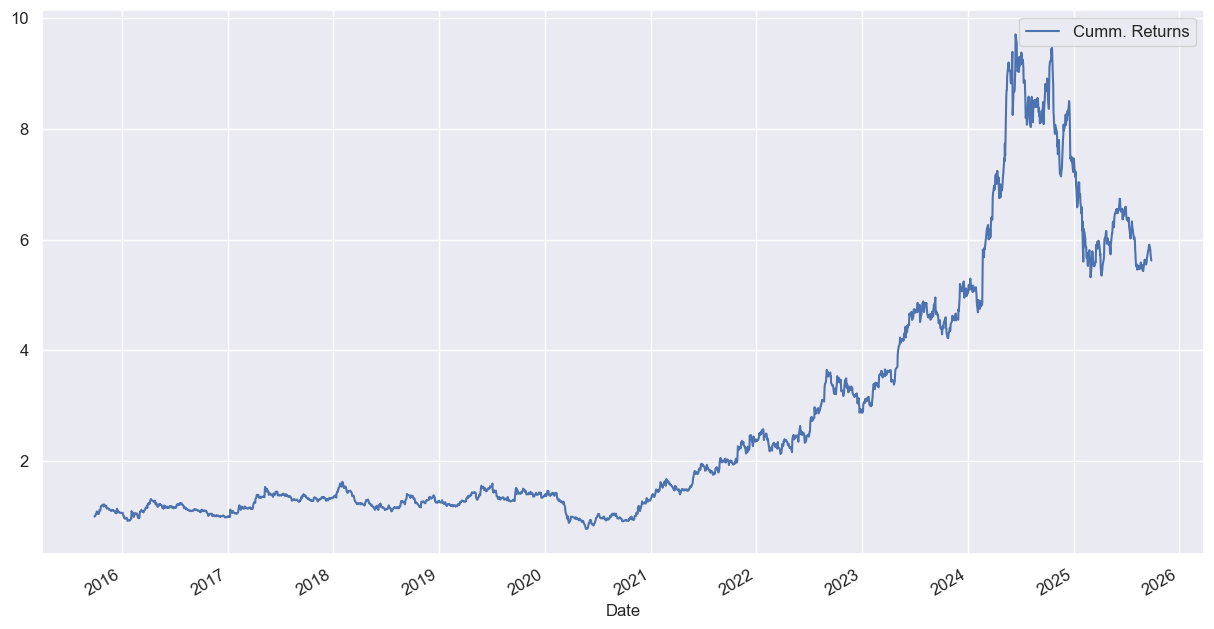

In [19]:
plot_df(data['Cumm. Returns'])

In [20]:
data['Cumm. Max'] = data['Cumm. Returns'].cummax()
data

,Close,High,Low,Open,Volume,Returns,Cumm. Returns,Cumm. Max
Date,,,,,,,,
2015-09-29,912.584229,916.861528,889.146611,912.191446,97769,-0.008761,0.991277,0.991277
2015-09-30,925.066833,945.187423,907.914150,945.187423,59984,0.013586,1.004836,1.004836
2015-10-01,921.226013,950.599442,913.107918,929.474977,25472,-0.004161,1.000664,1.004836
2015-10-05,965.831787,968.930621,920.920582,929.649653,95998,0.047284,1.049116,1.049116
2015-10-06,955.313232,999.482476,949.682995,973.295203,63224,-0.010950,1.037690,1.049116
...,...,...,...,...,...,...,...,...
2025-09-22,5362.799805,5455.299805,5341.000000,5430.000000,155891,-0.013723,5.825237,9.706594
2025-09-23,5298.700195,5375.399902,5285.000000,5360.200195,167342,-0.012025,5.755610,9.706594
2025-09-24,5237.299805,5349.799805,5223.600098,5298.000000,137979,-0.011655,5.688915,9.706594


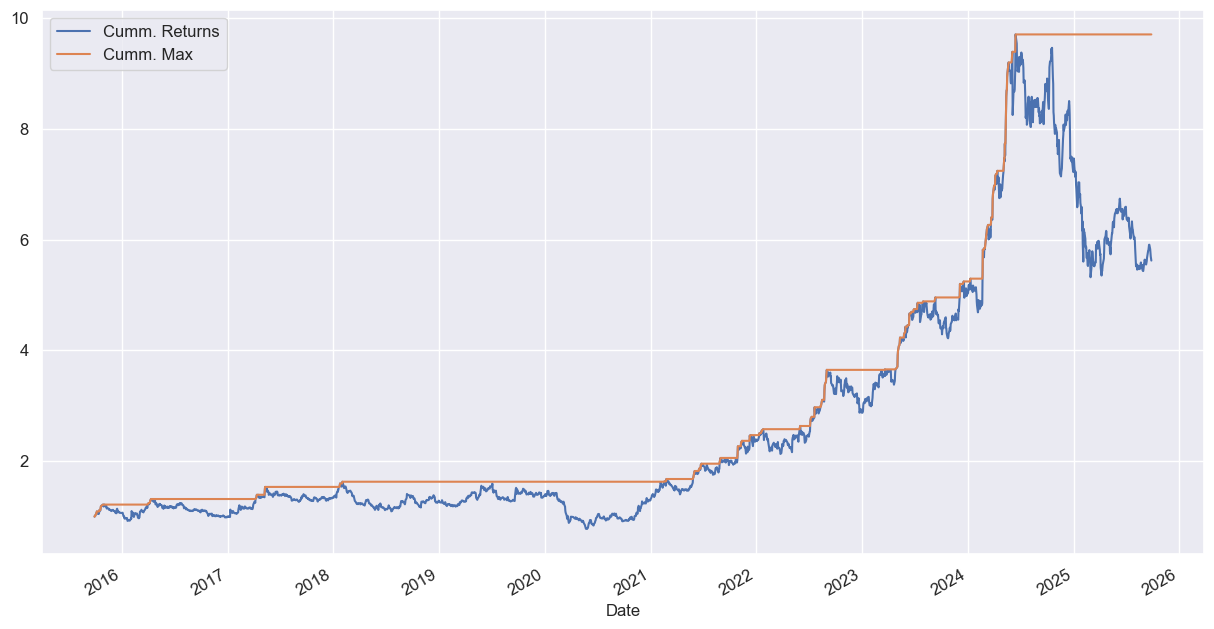

In [21]:
plot_df(data.loc[:, ['Cumm. Returns', 'Cumm. Max']])

In [22]:
data['Drawdown'] = data['Cumm. Max'] - data['Cumm. Returns']
data

,Close,High,Low,Open,Volume,Returns,Cumm. Returns,Cumm. Max,Drawdown
Date,,,,,,,,,
2015-09-29,912.584229,916.861528,889.146611,912.191446,97769,-0.008761,0.991277,0.991277,0.000000
2015-09-30,925.066833,945.187423,907.914150,945.187423,59984,0.013586,1.004836,1.004836,0.000000
2015-10-01,921.226013,950.599442,913.107918,929.474977,25472,-0.004161,1.000664,1.004836,0.004172
2015-10-05,965.831787,968.930621,920.920582,929.649653,95998,0.047284,1.049116,1.049116,0.000000
2015-10-06,955.313232,999.482476,949.682995,973.295203,63224,-0.010950,1.037690,1.049116,0.011426
...,...,...,...,...,...,...,...,...,...
2025-09-22,5362.799805,5455.299805,5341.000000,5430.000000,155891,-0.013723,5.825237,9.706594,3.881357
2025-09-23,5298.700195,5375.399902,5285.000000,5360.200195,167342,-0.012025,5.755610,9.706594,3.950984
2025-09-24,5237.299805,5349.799805,5223.600098,5298.000000,137979,-0.011655,5.688915,9.706594,4.017679


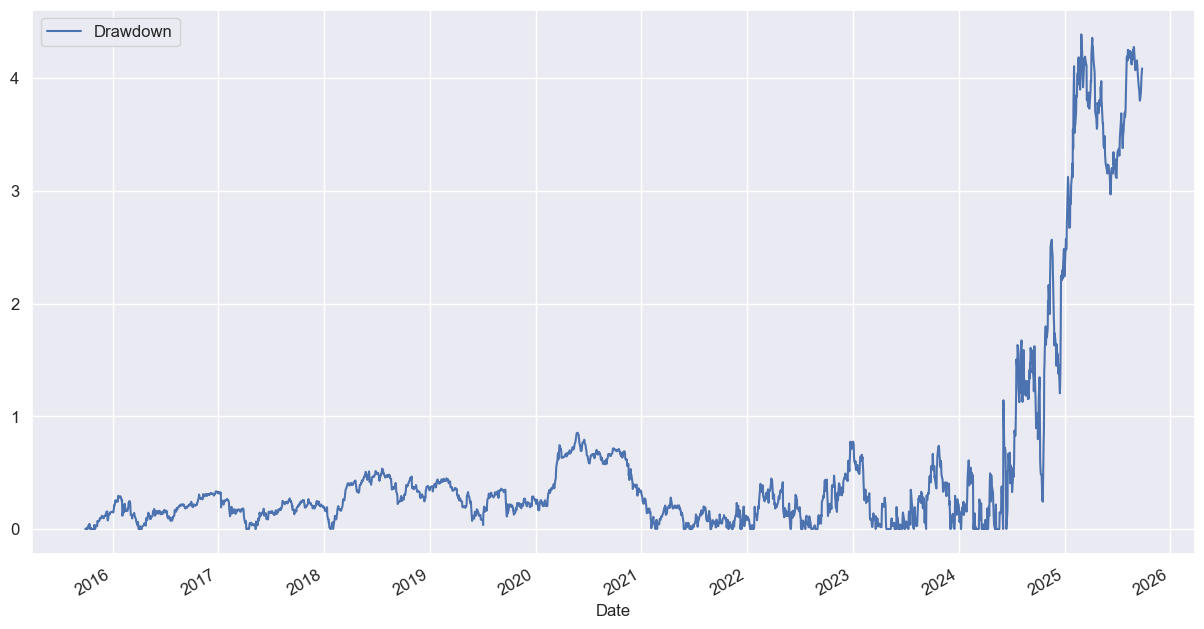

In [23]:
plot_df(data.loc[:, ['Drawdown']])

In [24]:
data['Drawdown %'] = ((data['Cumm. Max'] - data['Cumm. Returns']) / data['Cumm. Max']) * 100
data

,Close,High,Low,Open,Volume,Returns,Cumm. Returns,Cumm. Max,Drawdown,Drawdown %
Date,,,,,,,,,,
2015-09-29,912.584229,916.861528,889.146611,912.191446,97769,-0.008761,0.991277,0.991277,0.000000,0.000000
2015-09-30,925.066833,945.187423,907.914150,945.187423,59984,0.013586,1.004836,1.004836,0.000000,0.000000
2015-10-01,921.226013,950.599442,913.107918,929.474977,25472,-0.004161,1.000664,1.004836,0.004172,0.415194
2015-10-05,965.831787,968.930621,920.920582,929.649653,95998,0.047284,1.049116,1.049116,0.000000,0.000000
2015-10-06,955.313232,999.482476,949.682995,973.295203,63224,-0.010950,1.037690,1.049116,0.011426,1.089067
...,...,...,...,...,...,...,...,...,...,...
2025-09-22,5362.799805,5455.299805,5341.000000,5430.000000,155891,-0.013723,5.825237,9.706594,3.881357,39.986809
2025-09-23,5298.700195,5375.399902,5285.000000,5360.200195,167342,-0.012025,5.755610,9.706594,3.950984,40.704125
2025-09-24,5237.299805,5349.799805,5223.600098,5298.000000,137979,-0.011655,5.688915,9.706594,4.017679,41.391235


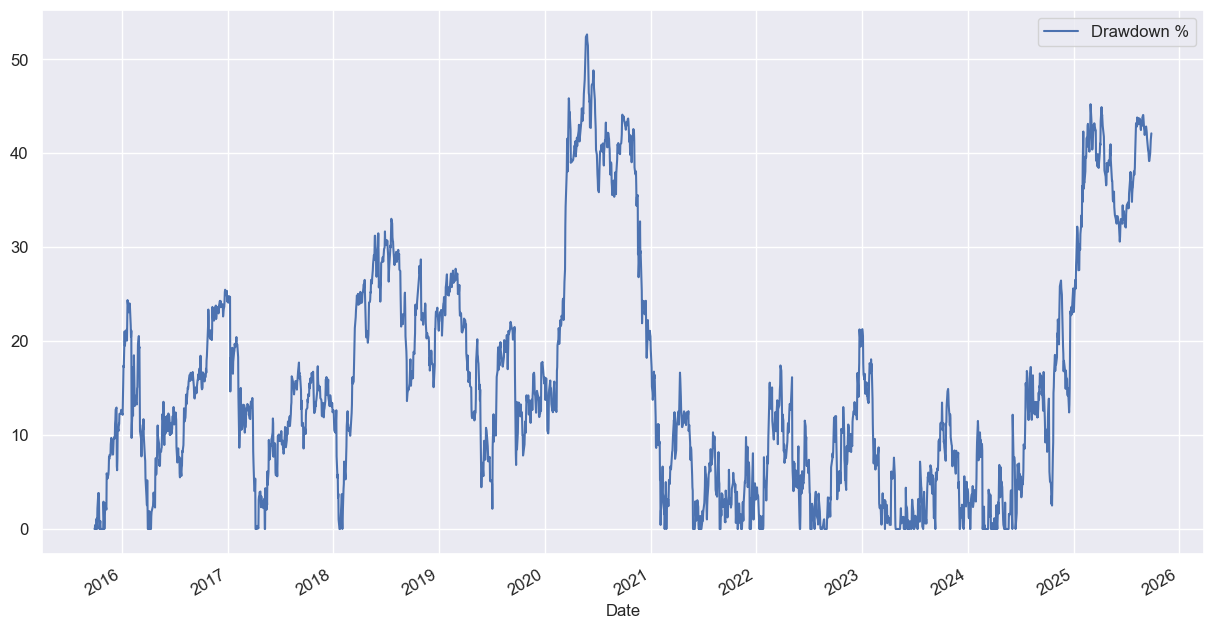

In [25]:
plot_df(data.loc[:, ['Drawdown %']])